# Late Delivery Risk Prediction :

## Import Libraries :

In [41]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [32]:
from scipy import stats
import statsmodels.api as sm
import statistics
from statsmodels.stats import weightstats
#from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
# function to perform post-hoc test


# import function to perform post-hoc
import scikit_posthocs
from scipy import stats
from statsmodels.stats import weightstats
import random

In [13]:
df = pd.read_csv("DataCoSupplyChainDataset.csv",encoding="ISO-8859-1")

In [14]:
df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


## Information about dataset  and datatypes :

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [19]:
df["Late_delivery_risk"]= pd.Series(df["Late_delivery_risk"],dtype=object)
df["Product Category Id"]= pd.Series(df["Product Category Id"],dtype=object)
df["Customer Id"]= pd.Series(df["Customer Id"],dtype=object)
df["Department Id"]= pd.Series(df["Department Id"],dtype=object)
df["Order Item Cardprod Id"]= pd.Series(df["Order Item Cardprod Id"],dtype=object)
df["Customer Zipcode"]= pd.Series(df["Customer Zipcode"],dtype=object)

## Data Description


1. **Type:** The type of the payment.
2. **Days for shipping (real):** The number of days it took for the order to be shipped after it was placed.
3. **Days for shipment (scheduled):** The number of days it was scheduled to take for the order to be shipped.
4. **Benefit per order:** The benefit (profit) gained from the order.
5. **Sales per customer:** The sales revenue generated per customer.
6. **Delivery Status:** The status of delivery (On Time / Advance / Late / Shipping Issues).
7. **Late_delivery_risk:** An indicator variable that shows whether an order is at risk of being delivered late or not.
8. **Category Id:** The unique identifier for the category.
9. **Category Name:** The name of the category.
10. **Customer City:** The city where the customer resides.
11. **Customer Country:** The country where the customer resides.
12. **Customer Email:** The email address of the customer.
13. **Customer Fname:** The first name of the customer.
14. **Customer Id:** The unique identifier for the customer.
15. **Customer Lname:** The last name of the customer.
16. **Customer Password:** The password for the customer account.
17. **Customer Segment:** The segment to which the customer belongs.
18. **Customer State:** The state where the customer resides.
19. **Customer Street:** The street address where the customer resides.
20. **Customer Zipcode:** The ZIP code where the customer resides.(zip code (short for "Zone Improvement Plan code") is a unique postal code used by postal services in the United States and other countries to facilitate mail delivery to a particular geographic area)
21. **Department Id:** The unique identifier for the department.
22. **Department Name:** The name of the department.
23. **Latitude:** The latitude coordinate of the customer's location.
24. **Longitude:** The longitude coordinate of the customer's location.
25. **Market:** The market region (APAC, EMEA, LATAM, US, Canada).
26. **Order City:** The city where the order was placed.
27. **Order Country:** The country where the order was placed.
28. **Order Customer Id:** The unique identifier for the customer who placed the order.
29. **Order Date (DateOrders):** The date and time when the order was placed.
30. **Order Id:** The unique identifier for the order.
31. **Order Item Cardprod Id:** The unique identifier for the product card.
32. **Order Item Discount:** The amount of discount applied to the product.
33. **Order Item Discount Rate:** The percentage of discount applied to the product.
34. **Order Item Id:** The unique identifier for the order item.
35. **Order Item Product Price:** The price of the product per unit.
36. **Order Item Profit Ratio:** The profit ratio (profit / revenue) of the order item.
37. **Order Item Quantity:** The quantity of the product in the order.
38. **Sales:** The sales revenue generated by the order item.
39. **Order Item Total:** The total price of the order item.
40. **Order Profit Per Order:** The profit gained from the order.
41. **Order Region:** The region where the order was placed.
42. **Order State:** The state where the order was placed.
43. **Order Status:** The status of the order (PENDING, APPROVED, CANCELED, COMPLETE).
44. **Product Card Id:** The unique identifier for the product card
46. **Product Category Id:** The unique identifier for the product category.
47. **Product Description:** The description of the product.
48. **Product Image:** The link to visit and purchase the product.
49. **Product Name:** The name of the product.
50. **Product Price:** The price of the product.
51. **Product Status:** The status of the product stock. If it is 1, the product is not available; if it is 0, the product is available.
52. **Shipping date (DateOrders):** The exact date and time of shipment.
53. **Shipping Mode:** The following shipping modes are presented: Standard Class, First Class, Second Class, and Same Day.
 

## Possible analysis In the Data :
`Sales trends analysis`: Analyzing sales data over time to identify patterns and trends in sales, such as seasonal fluctuations, changes in customer behavior, or the impact of marketing campaigns.

`Customer segmentation analysis`: Segmenting customers based on demographics, purchase history, or other factors, and analyzing their behavior and preferences to identify opportunities for targeted marketing, upselling, or retention efforts.

`Product recommendation analysis`: Using collaborative filtering or other algorithms to recommend products to customers based on their purchase history, browsing behavior, or other factors.

## Possible Target columns 

`Delivery Status`: Predicting the delivery status of an order, i.e. whether an order will be delivered on time or late.

`Late_delivery_risk`: Predicting the likelihood of late delivery for an order.

`Order Profit Per Order`: Predicting the profit per order.

`Customer Segment`: Predicting the customer segment to which a customer belongs.

`Order Status`: Predicting the status of an order, i.e. whether it will be delivered, cancelled or returned.

## Null Values

In [20]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


## Dropping Redundant Features :

In [21]:
df.drop(["Product Description","Order Zipcode","Customer Email","Customer Street","Customer Password",
                "Product Image","Order Customer Id","Category Id","Customer Fname","Customer Lname","Department Name",
                "Benefit per order","Sales per customer","order date (DateOrders)","Product Status",
                "shipping date (DateOrders)","Category Name","Order Id", "Order Item Id", "Product Card Id"],axis=1,inplace=True)
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Latitude,Longitude,Market,Order City,Order Country,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Name,Product Price,Shipping Mode
0,DEBIT,3,4,Advance shipping,0,Caguas,Puerto Rico,20755,Consumer,PR,725.0,2,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1360,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,Standard Class
1,TRANSFER,5,4,Late delivery,1,Caguas,Puerto Rico,19492,Consumer,PR,725.0,2,18.279451,-66.037064,Pacific Asia,Bikaner,India,1360,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,Standard Class
2,CASH,4,4,Shipping on time,0,San Jose,EE. UU.,19491,Consumer,CA,95125.0,2,37.292233,-121.881279,Pacific Asia,Bikaner,India,1360,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,Standard Class
3,DEBIT,3,4,Advance shipping,0,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,2,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1360,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,73,Smart watch,327.75,Standard Class
4,PAYMENT,2,4,Advance shipping,0,Caguas,Puerto Rico,19489,Corporate,PR,725.0,2,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1360,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,73,Smart watch,327.75,Standard Class


## Reasons for  dropping Redundant Features :
* The <b>'product description'</b> column was dropped from the dataset since it contained <b>100% null values</b>. 
  this column did not provide any useful information for analysis and was therefore deemed irrelevant.
  
* The <b>'Order Zipcode'</b> column was dropped from the dataset since it contained <b>86.23%  null values</b>. 
  this column did not provide any useful information for analysis and was therefore deemed irrelevant.
  
* The columns <b>'Customer Email', 'Customer Password', 'Customer Fname', and 'Customer Lname'</b> were dropped from 
  the dataset since they were not expected to have a significant impact on predicting the target variable 
  'late delivery risk'. These columns were deemed irrelevant to the analysis and were therefore removed."
  
* The <b>"Benefit per order"</b> is giving the same information as "order profit per order" so we drop "Benefit per     order".
* Similarly <b>"Category Id" and "Category Name" </b> giving the same information about "Product Category ID" so we drop the "Catogory ID" and "Category Name".
* Similarly the <b>"Order Customer ID"</b> giving the same information as "Customer Id" so we drop the 
  "Order Customer   ID".
* Similarly the <b> "Sales per customer"</b>giving the same information as "Order Item Total" so we drop the 
  "Sales per customer".
* Similarly <b> Department Name </b> giving the same information as "Department ID" so we drop the 
  "Department Name ".

* The column <b>'Customer Street'</b> was dropped from the dataset since the information it contained was redundant 
  with other columns such as 'Customer Zipcode', 'Customer City', 'Customer State', and 'Customer Country'.
  
* <b>"Product Images" </b>do not provide any direct information related to the delivery process and therefore were
  deemed unnecessary for the analysis. Hence, 'product images' was removed to simplify the dataset and reduce 
  its complexity."
  
* The columns <b>'order date (DateOrders)' and 'shipping date (DateOrders)'</b> were dropped from the dataset, 
  as they contained redundant information with the columns'Days for shipping(real)' and'Days for shipment(scheduled)'.
  Since these columns were made by feature engineering and the target variable was 'late delivery risk', 
  it was decided to keep the columns 'Days for shipping (real)' and 'Days for shipment (scheduled)' for analysis, 
  as they provided more relevant information about the shipping and delivery process.
  
* All values in <b>"Product Status"</b> are zero so given feature is not giving information in data set so we drop it.
* "The columns <b>'Order Id', 'Order Item Id', and 'Product Card Id'</b> were dropped from the dataset, 
  as they were not expected to have a significant impact on predicting the target variable 'late delivery risk'. 
  These columns might have been redundant or irrelevant to the analysis, and could also have had data quality issues.
  Therefore, 'Order Id', 'Order Item Id', and 'Product Card Id' were deemed unnecessary and were removed to simplify 
  the dataset and reduce its complexity."

In [40]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Delivery Status                  0
Late_delivery_risk               0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 3
Department Id                    0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region                     0
Order State                      0
Order Status        

* There are only <b >3 null values </b> in <b> Customer zipcode </b> so we can drop that records.

In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum().sum()

0

* Now given dataset are not contains the null values anymore.

## Univariate analysis :

### Numerical analaysis : 

In [23]:
num_col = df.select_dtypes(np.number).drop(['Latitude','Longitude','Days for shipping (real)', 
                                             'Days for shipment (scheduled)'],axis=1).columns

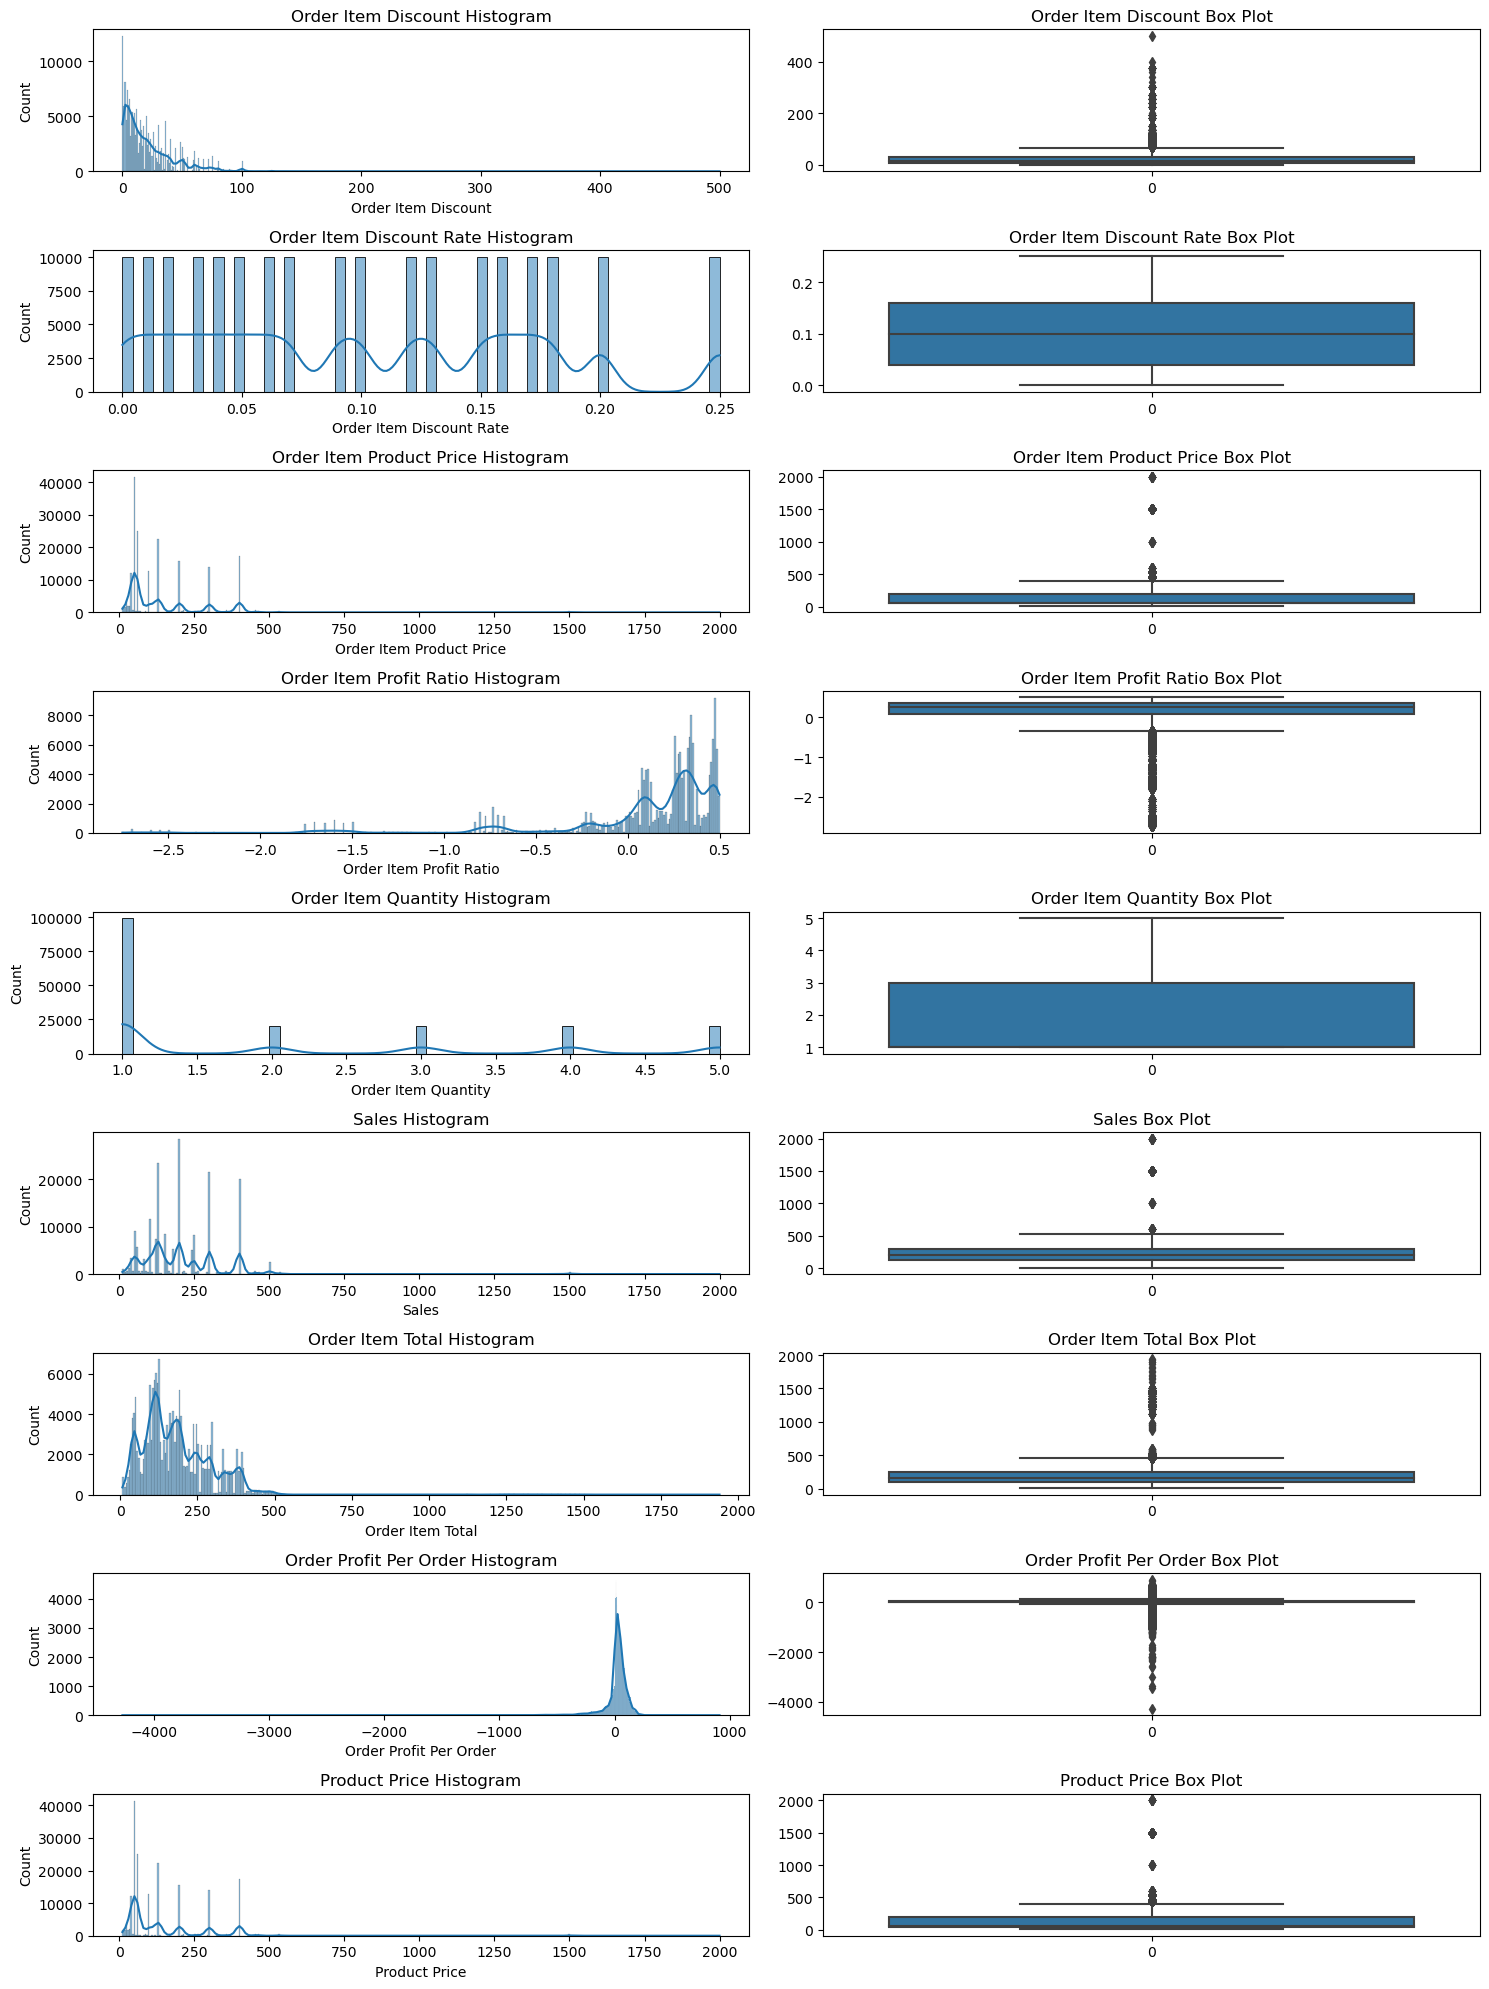

In [24]:
row = 9
col = 2
count = 1
fig, axs = plt.subplots(nrows=row, ncols=col, figsize=(15,20))

for i in num_col:
    sns.histplot(data=df[i], ax=axs[count-1, 0], kde=True)
    axs[count-1, 0].set_title(i + ' Histogram')
    sns.boxplot(data=df[i], ax=axs[count-1, 1], orient='v')
    axs[count-1, 1].set_title(i + ' Box Plot')
    count += 1

fig.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()

* All the <b> Numerical Columns </b> which we have in our Dataset is <b>Fully Skewed either right or left</b> . We are planning   to do the statistical test to verify whether these columns are giving information about Predicting the target.
  After that we need to Remove the Outliers by IQR method, Capping or based on the Business understanding. 


### Catogorical analaysis : 

####  Target varibale : Late Delivery risk :

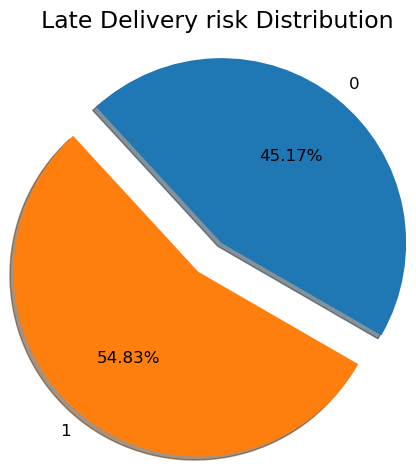

In [180]:
plt.figure(figsize=(5,4))
plt.pie((df['Late_delivery_risk'].value_counts()[0],df['Late_delivery_risk'].value_counts()[1]),labels=df.Late_delivery_risk.unique(), 
        textprops = {"fontsize":12}, shadow=True, startangle=330, radius=1.5, autopct='%2.2f%%', explode=[0,0.3])
plt.title('Late Delivery risk Distribution \n\n', fontdict={'fontsize': 17})
plt.show()

* <b> class 1 (Late delivery risk) - 54.83%</b>
* <b> class 0 (Late delivery risk) - 45.17%</b>
* Our <b> target variable </b>is balance it ensures that the model is exposed to a similar number of examples from each class during training, and this can help prevent biases towards one class and improve the overall performance of the model.

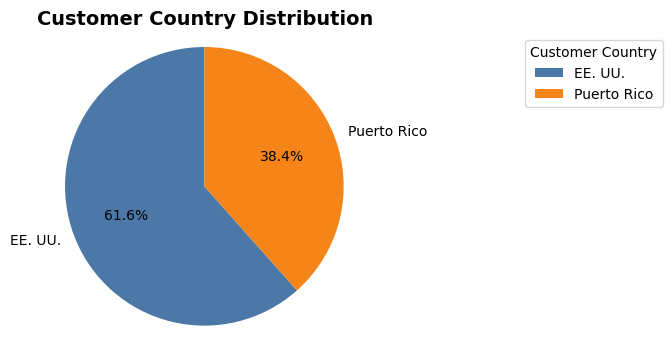

In [88]:
payment_counts = df['Customer Country'].value_counts()
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']
plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Customer Country Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Customer Country', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

* <b>EE.UU country</b> with <b> 61.6%</b> of the customers may have a larger market share or a more favorable business environment 
that attracts more customers. Alternatively, it could be that the company has invested more resources in marketing or operations in that country, leading to a higher customer base. 
On the other hand, the <b>Puerto Rico country</b> with <b>38.4%</b> of the customers may have a smaller market or less favorable 
business conditions, or the company may have less investment in that market.

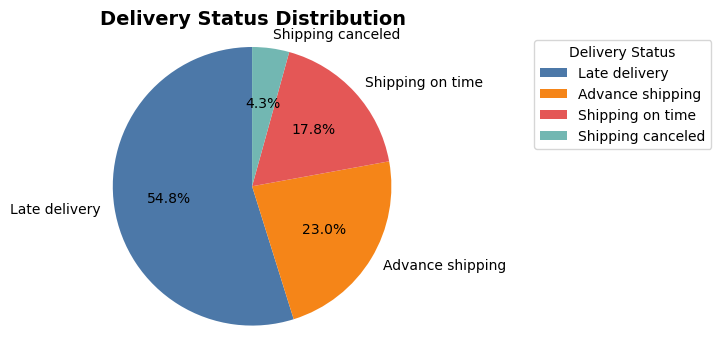

In [33]:
payment_counts = df['Delivery Status'].value_counts()
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']
plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Delivery Status Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Delivery Status', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

* <b>54.8%</b> orders were delivered late.
* <b>23%</b> orders were shipped in advance.
* <b>17.8%</b> orders were shipped on time.
* <b>4.3% </b>of shipping were canceled.

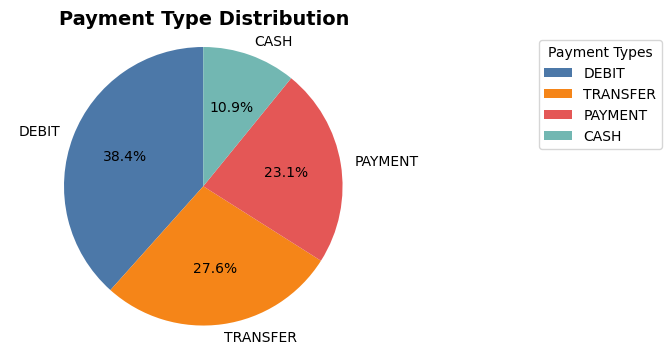

In [34]:
payment_counts = df['Type'].value_counts()
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']
plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Payment Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Payment Types', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

* <b>38.4%</b> people used debit payment.
* <b>27.6%</b> people used transfer sysytem.
* <b>23.1% </b>people used payment system.
* <b>10.9% </b>people used cash payment.

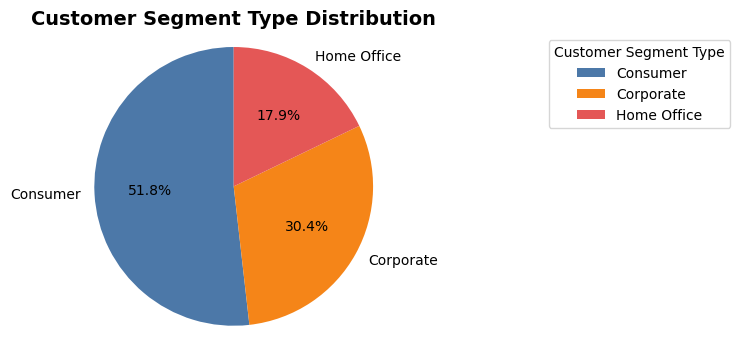

In [36]:
payment_counts = df['Customer Segment'].value_counts()
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']
plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segment Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Customer Segment Type', bbox_to_anchor=(1, 0, 0.8, 1))
plt.show()

* <b>51.8%</b> of customers are consumers.
* <b>30.4%</b> are corporates.
* <b>17.9%</b>  people are from home office category.

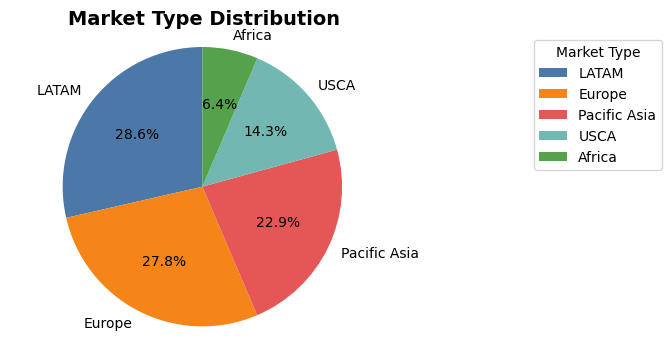

In [37]:
payment_counts = df['Market'].value_counts()
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']
plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Market Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Market Type', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

* Most of the order comming from <b>LATAM</b> which is  <b>28.6%</b>.
* Order comming from <b> EUROPE </b>  which is <b> 27.8% </b>.
* Order comming from <b> PACIFIC ASIA </b>   which is <b> 22.9% </b>.
* Order coming from <b> USCA </b>  which is  <b> 14.3%</b>.
* Less number of the order from <b> AFRICA </b> which is <b> 6.4</b>. 

###  Top 20 and last 10 values distribution for Customer city and Order City

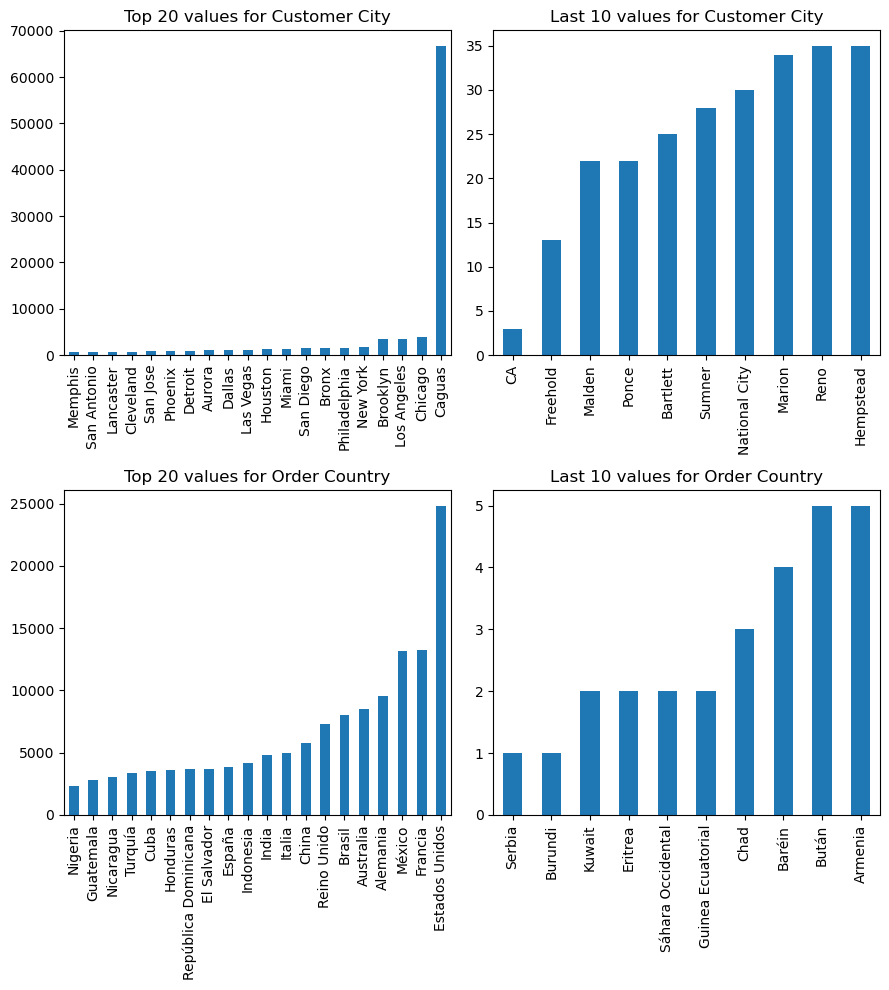

In [38]:
cat_cols = ['Customer City', 'Order Country']
value_counts = {col: df[col].value_counts() for col in cat_cols}
sorted_value_counts_top = {col: vc.sort_values() for col, vc in value_counts.items()}
sorted_value_counts_last = {col: vc.sort_values() for col, vc in value_counts.items()}
topn = 20
lastn = 10
topn_counts = {col: vc[-topn:] for col, vc in sorted_value_counts_top.items()}
lastn_counts = {col: vc[:lastn] for col, vc in sorted_value_counts_last.items()}
fig, axs = plt.subplots(len(cat_cols), 2, figsize=(9, len(cat_cols) * 5))

for i, col in enumerate(cat_cols):
    topn_counts[col].plot(kind='bar', ax=axs[i, 0])
    axs[i, 0].set_title(f'Top {topn} values for {col}')
    
    lastn_counts[col].plot(kind='bar', ax=axs[i, 1])
    axs[i, 1].set_title(f'Last {lastn} values for {col}')

plt.tight_layout()
plt.show()

* Most of the customers are situated in <b>Caguas City</b>  who ordered more and customers which situated  in
  <b> CA</b> who are order less.
* Most of the customers order from <b>Estados Unidos</b> and very less customers are order form <b> Serbia and Burundi <b/>.

## SIMPLE RANDOM SAMPLING 

#### Simple random sampling is a type of probabilistic sampling in which the samples will be randomly select from population.

* User define function for catogorical columns and numerical columns 

In [40]:
def cat_num_cols(data):
    cat_cols = cat_cols = data.select_dtypes(np.object).columns
    num_cols = data.columns.drop(cat_cols)
    return cat_cols,num_cols

* So on population in numerical analysis we see that all the numerical variable are skewed i.e <b> data is not normal</b>  
  so we are not able to use paraetric test like t-test two independent sample test so we are using <b>MannWhitney-Utest </b>
  for checking is
  the population mean is equal to sample mean 
##### MannWhitney U-hypotheisis test :

* <b> H0 : Population mean = Sample mean </b>
* <b> H1 : Population mean != Sample mean </b>

In [42]:
def mannwhitneyu_test(pop_series,sample_series):
    stat_val,p_value = stats.mannwhitneyu(pop_series,sample_series)
    if p_value > 0.05:
        return True
    else:
        return False   

* for <b> catorgorical feature </b> we have to check the distribution of all types in each catogorical feature in sample and 
 population will be same so for that we are using the <b>Chi Square goodness of fit</b>
 
#### Chi square Goodness of Fit :
* <b> H0 : There is no significance difference between expected values(from population) and observed values (from sample) </b>
* <b> H1 : There is  significance difference between expected values(from population) and observed values (from sample) </b>

In [43]:
def chi_square_goodness(pop_series,sample_series,alpha = 0.05):
    exp = pop_series.value_counts(normalize=True)*len(sample_series)
    obs = sample_series.value_counts()
    obs_fil = pd.Series(obs,index=exp.index).fillna(0)
    stat1,p_value = stats.chisquare(obs_fil,exp)
    if p_value>0.05:
        return True
    else:
        return False

* Using <b> MannWhitney U-test and Chi Square goodness of fit</b> we make user define function to check which size 
  we have want for sample so that we can say that this given sample passes both the test for each columns and it is     good representation of population.

In [44]:
def sampling_validation(data,start_sample_size,end_sample_size,incre):
    cat_col = cat_num_cols(data)[0]
    num_col = cat_num_cols(data)[1]
    d = {}
    for sample_size in np.arange(start_sample_size,end_sample_size,incre):
        num_cols = []
        for i in range(0,20):
            track_cols =[]
            valid_cols=0
            df_samp = data.sample(sample_size)
            for col in data.columns:
                if col in num_col:
                    if mannwhitneyu_test(data[col],df_samp[col]):
                        valid_cols+=1
                else:
                    if chi_square_goodness(data[col],df_samp[col]):
                        valid_cols+=1       
            num_cols.append(valid_cols)
        d[sample_size] = np.mean(num_cols)
    return d 

In [46]:
dic = sampling_validation(df,5000,100000,5000)
dic

{5000: 31.25,
 10000: 32.2,
 15000: 32.35,
 20000: 32.15,
 25000: 32.3,
 30000: 32.35,
 35000: 32.65,
 40000: 32.6,
 45000: 32.7,
 50000: 32.9,
 55000: 32.75,
 60000: 32.95,
 65000: 32.9,
 70000: 32.8,
 75000: 32.9,
 80000: 32.9,
 85000: 32.95,
 90000: 33.0,
 95000: 33.0}

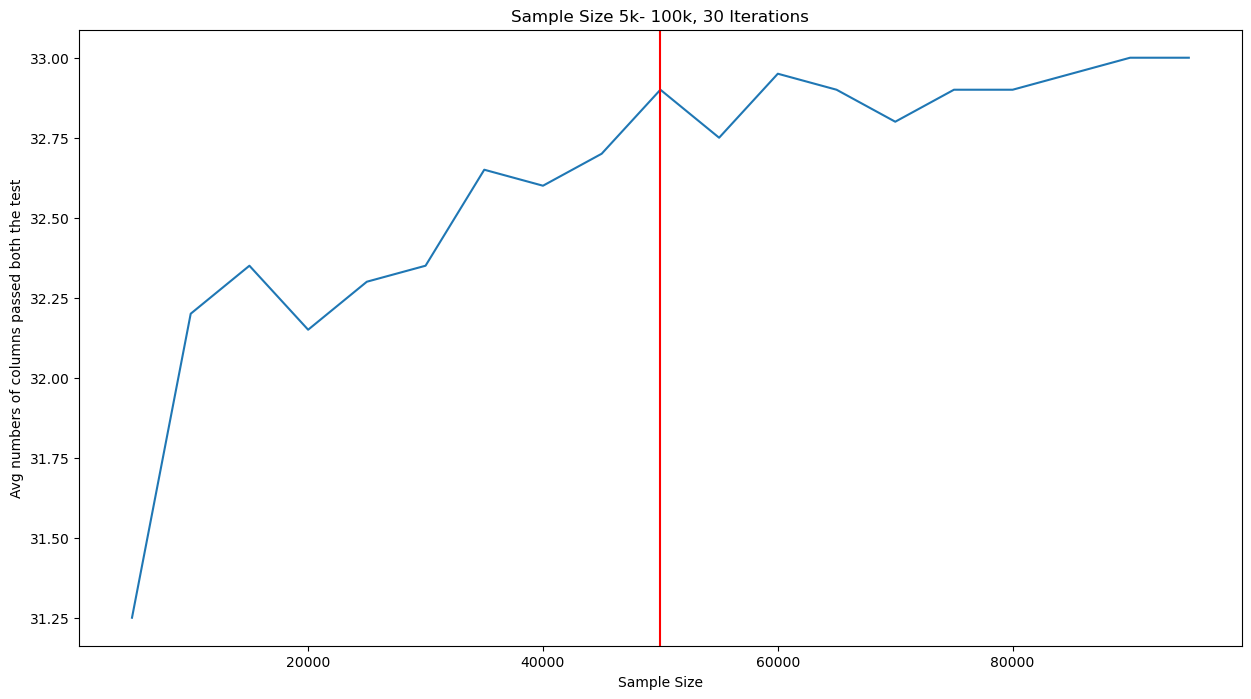

In [49]:
sns.lineplot(x=dic.keys(),y=dic.values())
plt.title('Sample Size 5k- 100k, 30 Iterations')
plt.xlabel('Sample Size')
plt.ylabel('Avg numbers of columns passed both the test')
plt.axvline(x = 50000,color='red')
plt.show()

* By using the <b>Simple Random sampling technique</b> we are generating <b>30 different random sample</b> for each <b> sample size(5k,10k,50k….) </b> and by doing the ‘Mann Whitney U’ test and ‘chi square goodness of fit’  for each generated sample. And calculating the average of no of columns passing both the test for every sample size for 30 iterations. 
From this we make a plot and we can clearly able to see there is too much hike between the range of 5k to 20k and again from 20k to 45k. After that we can able to see there is no hike in the average which is indicates that all the columns are passing the both test at each iteration.


In [44]:
def selecting_sample(data,sample_size):
    cat_col = cat_num_cols(data)[0]
    num_col = cat_num_cols(data)[1]
    cnt=0
    while True:
        cnt +=1
        valid_col =0
        df_samp = data.sample(sample_size)
        for col in data.columns:
            if col in num_col:
                if not mannwhitneyu_test(data[col],df_samp[col]):
                    break
            else:
                if not chi_square_goodness(data[col],df_samp[col]):
                    break
            valid_col +=1
        if valid_col == len(df.columns):
            print(cnt)
            return df_samp        

In [45]:
df_new_trial = selecting_sample(df,50000)

1


In [56]:
df_sample = pd.read_csv('final_sample (1).csv')

In [57]:
df_sample.drop('Unnamed: 0',axis=1,inplace=True)

In [58]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           50000 non-null  object 
 1   Days for shipping (real)       50000 non-null  int64  
 2   Days for shipment (scheduled)  50000 non-null  int64  
 3   Delivery Status                50000 non-null  object 
 4   Late_delivery_risk             50000 non-null  int64  
 5   Customer City                  50000 non-null  object 
 6   Customer Country               50000 non-null  object 
 7   Customer Id                    50000 non-null  int64  
 8   Customer Segment               50000 non-null  object 
 9   Customer State                 50000 non-null  object 
 10  Customer Zipcode               50000 non-null  float64
 11  Department Id                  50000 non-null  int64  
 12  Latitude                       50000 non-null 

In [59]:
df_sample["Late_delivery_risk"]= pd.Series(df_sample["Late_delivery_risk"],dtype=object)
df_sample["Product Category Id"]= pd.Series(df_sample["Product Category Id"],dtype=object)
df_sample["Customer Id"]= pd.Series(df_sample["Customer Id"],dtype=object)
df_sample["Department Id"]= pd.Series(df_sample["Department Id"],dtype=object)
df_sample["Order Item Cardprod Id"]= pd.Series(df_sample["Order Item Cardprod Id"],dtype=object)
df_sample["Customer Zipcode"]= pd.Series(df_sample["Customer Zipcode"],dtype=object)

In [60]:
df_sample.describe()

,Days for shipping (real),Days for shipment (scheduled),Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.498140,2.927680,29.726470,-84.856839,20.564199,0.101212,141.219129,0.120579,2.129040,203.550493,182.986542,21.940939,141.219129
std,1.630144,1.379075,9.821217,21.479170,21.663170,0.070202,140.672939,0.465650,1.452994,133.058238,120.821810,105.802651,140.672939
min,0.000000,0.000000,-33.937553,-158.025986,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,9.990000
25%,2.000000,2.000000,18.266146,-98.274086,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003,104.379997,7.040000,50.000000
50%,3.000000,4.000000,33.144863,-76.766708,14.000000,0.090000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59.990002
75%,5.000000,4.000000,39.288494,-66.370583,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012,245.979996,64.769997,199.990005
max,6.000000,4.000000,48.781933,115.263077,375.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990,1899.989990,720.000000,1999.989990


* We check the description for numerical columns for sample and population we can clearly see that given sample is good represenation of population

In [15]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [61]:
df_long_lat = df_sample[['Latitude','Longitude']]

## Analysis on sample 

### Bivariate Analysis 

#### Catogorical vs Catogorical :

In [126]:
df_sample.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Category Id', 'Product Name', 'Product Price',
       'Shipping Mode'],
      dtype='object')

### City Analysis 

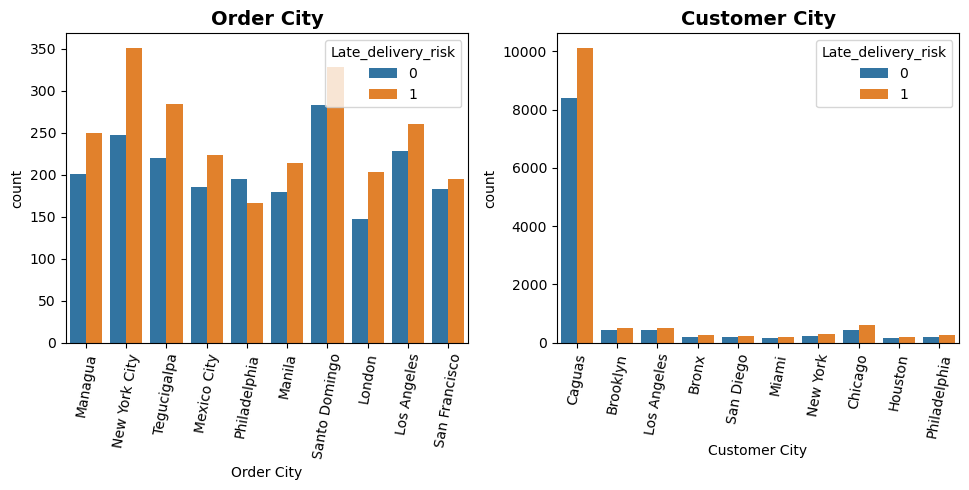

In [127]:
plt.figure(figsize=(10,5))
for i, col in enumerate(['Order City','Customer City'], 1):
    plt.subplot(1,2,i)
    top_cats_name = df_sample[col].value_counts().head(10).index
    df_top_cats_name = df_sample[df_sample[col].isin(top_cats_name)] 
    sns.countplot(df_top_cats_name[col], hue = df_sample['Late_delivery_risk'])
    plt.title(col,fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.xticks(rotation =80)
plt.show()

* When the order comming from the <b> New York City and Santo Dommingo </b> most of the delivery are late.
* Anyhow most of the Customer from the <b>Caguas city</b> so at that city late dilvery risk is high.

### Shipping Mode Analysis:

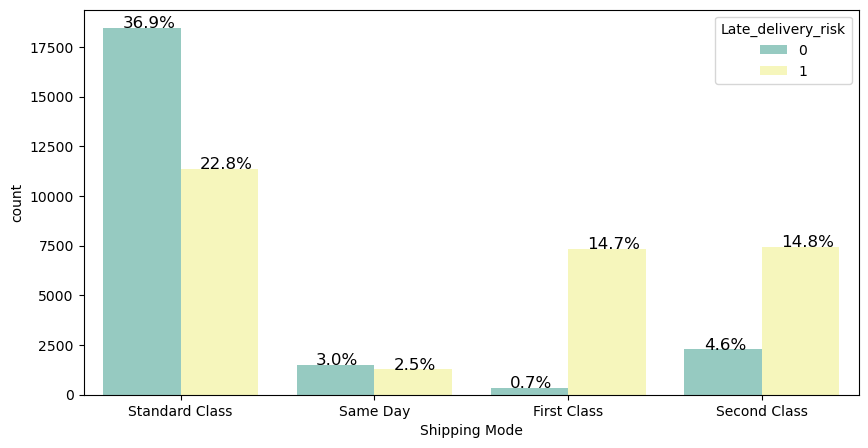

In [187]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Shipping Mode', hue='Late_delivery_risk', data=df_sample, palette='Set3')
total = len(df_sample['Shipping Mode'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()

* <b> Standard Class</b> is the most popular shipping mode
* Late delivey is even observed in <b> first class</b> shipping mode.

### Customer Segment Analysis

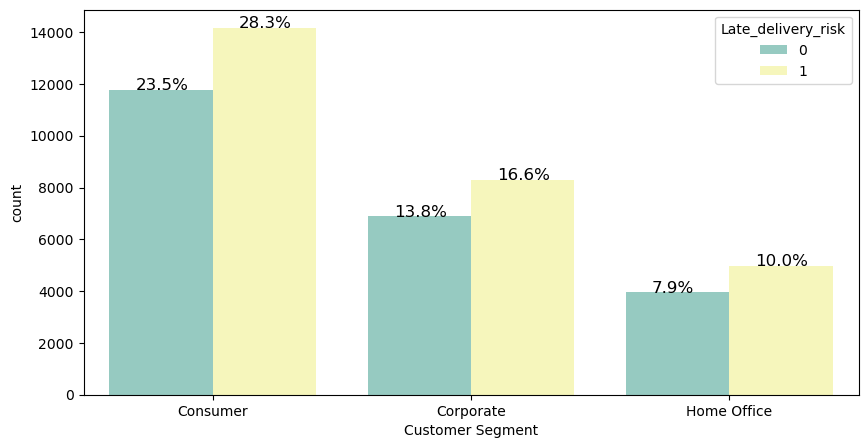

In [70]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Customer Segment', hue='Late_delivery_risk', data=df_sample, palette='Set3')
total = len(df_sample['Customer Segment'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()

* <b> 28.3% </b> late delivery to Consumer and <b> 23.5% </b> are not late delivery to Consumer
* <b> 16.6% </b> late delivery to Corporate Customer Segment and <b> 13.8%</b> are not late delivery to Corporate Customer Segment 
* <b> 10.0% </b> late delivery to Home Office and <b> 7.9 </b> are not late delivery to Home Office 

###  Market Analysis 

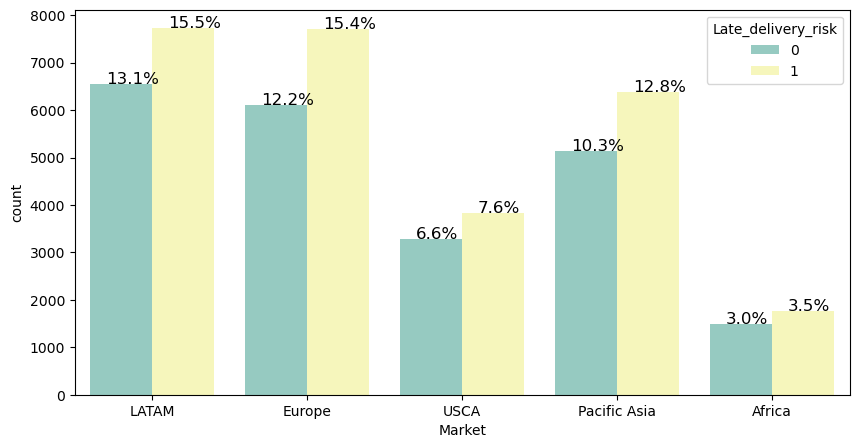

In [72]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Market', hue='Late_delivery_risk', data=df_sample, palette='Set3')
total = len(df_sample['Market'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()

* Same number of percentage <b>(approx 15.5%) </b> of late delivery from EUROPE and LATAM 
* Less number of percentage <b> 3.5% </b> of late delivery from Africa because anyhow less number of delivery are comming from Africa.

### Customer Country  Analysis :

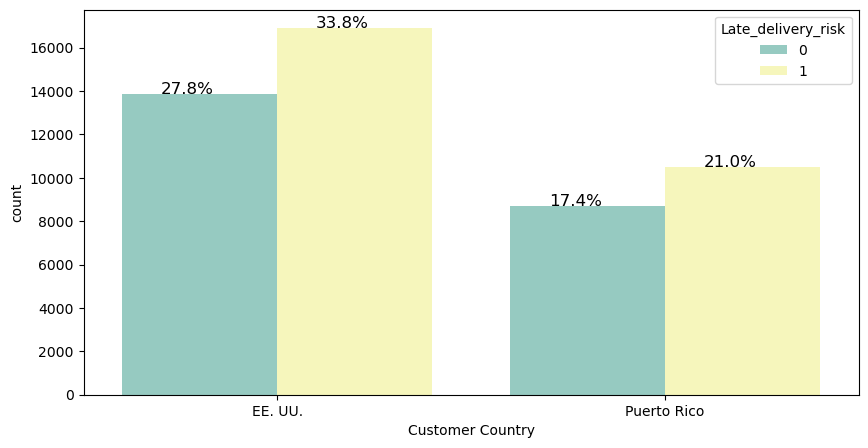

In [75]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Customer Country', hue='Late_delivery_risk', data=df_sample, palette='Set3')
total = len(df_sample['Customer Country'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()

* <b> 33.8% </b> late delivery going to  EE.UU country and <b> 27.8% </b> are not late delivery.
* <b> 21.0% </b> late delivery going to  Puerto Rico and <b> 17.4% </b> are not late delivery.

## Statistical Hypothesis test with target variable

### Chi2  Contingency test  :

* <b> H0 : X and Y(Late delivery risk) are independent. 
* <b> H1 : X and Y (Late delivery risk) are dependent.

* Using above test we compare the catogorical feature vs target variable and above test giving that which 
  feature is dependent on target variable.

In [149]:
def cat_num_cols(data):
    cat_cols = cat_cols = data.select_dtypes(np.object).columns
    num_cols = data.columns.drop(cat_cols)
    return cat_cols,num_cols

In [150]:
def cols_failing_chi2_contigency(data):   
    failed_cat_cols = []
    for col in cat_num_cols(data)[0]:
        target = pd.crosstab(data[col],data["Late_delivery_risk"]).values
        if stats.chi2_contingency(target)[1]<=0.05:
            print(col,"---Dependency with target: ",stats.chi2_contingency(target)[1])
        elif stats.chi2_contingency(target)[1]>0.05:
            print(col,"---Independency with target: ",stats.chi2_contingency(target)[1])
            failed_cat_cols.append(col)
    return failed_cat_cols 

In [151]:
cols_failing_chi2_contigency(df_sample)

Type ---Dependency with target:  3.983218645453983e-63
Delivery Status ---Dependency with target:  0.0
Late_delivery_risk ---Dependency with target:  0.0
Customer City ---Dependency with target:  1.2924070674132346e-17
Customer Country ---Independency with target:  0.6471214715360867
Customer Id ---Dependency with target:  8.458022480688344e-266
Customer Segment ---Independency with target:  0.14820863801169445
Customer State ---Independency with target:  0.14553370113586203
Customer Zipcode ---Dependency with target:  1.3546076974687284e-30
Department Id ---Independency with target:  0.6173245973490966
Market ---Dependency with target:  0.009368953749959769
Order City ---Dependency with target:  4.3082119343917024e-122
Order Country ---Dependency with target:  4.6779481274142924e-07
Order Item Cardprod Id ---Independency with target:  0.5789665482034425
Order Region ---Dependency with target:  0.004274655797848006
Order State ---Dependency with target:  9.076168501313578e-49
Order Sta

['Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Id',
 'Order Item Cardprod Id',
 'Product Category Id',
 'Product Name']

* There are six features <b>'Customer Country', 'Customer State', 'Product Name','Department Id','Order ItemCardprod Id','Product Category Id','Product Name'</b> are Independent with Late delivery risk so we drop that from dataset.

In [153]:
df_sample.drop(['Customer Country','Customer State','Department Id','Order Item Cardprod Id','Product Category Id','Product Name'],axis=1,inplace=True)

In [154]:
df_sample.shape

(50000, 27)

In [160]:
df_sample.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Customer City', 'Customer Id',
       'Customer Segment', 'Customer Zipcode', 'Latitude', 'Longitude',
       'Market', 'Order City', 'Order Country', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Price', 'Shipping Mode'],
      dtype='object')

### Catogorical vs Numerical :

In [159]:
cols = list(df_sample.select_dtypes(np.number).drop(['Latitude','Longitude'],axis=1).columns)
cols

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

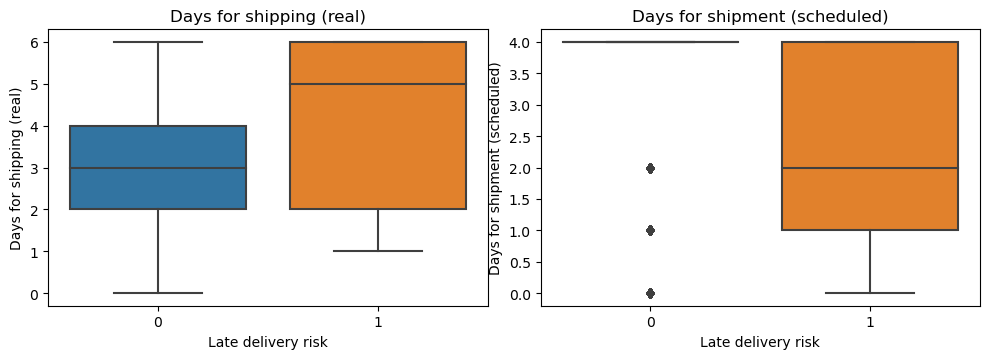

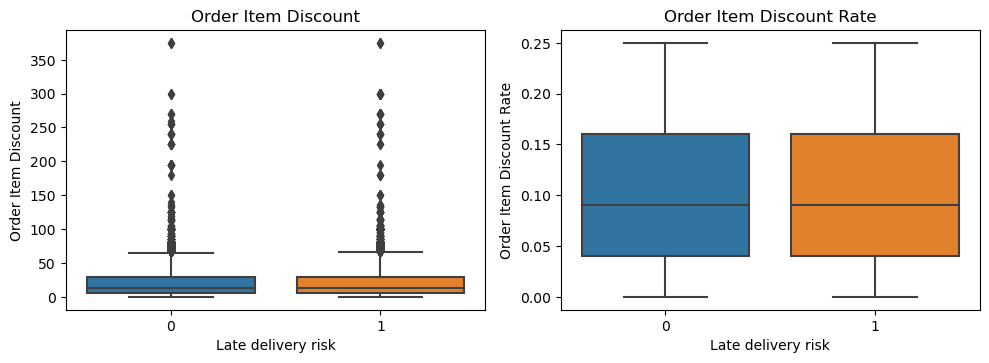

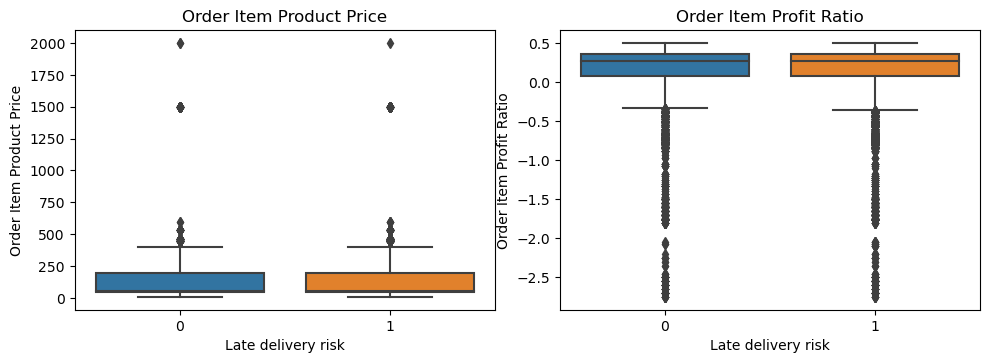

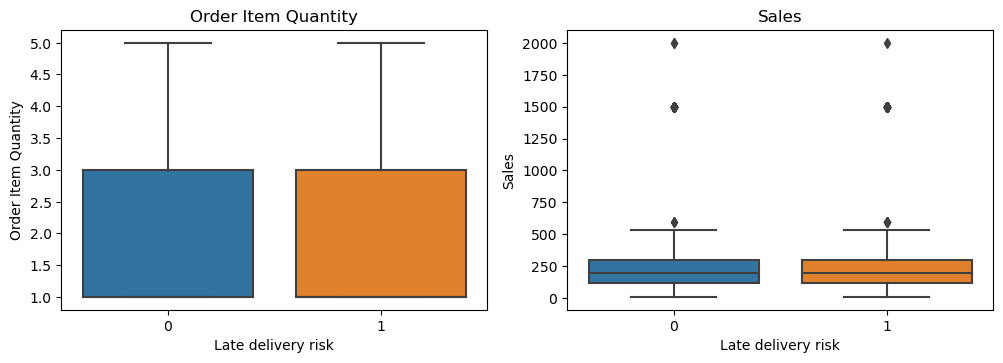

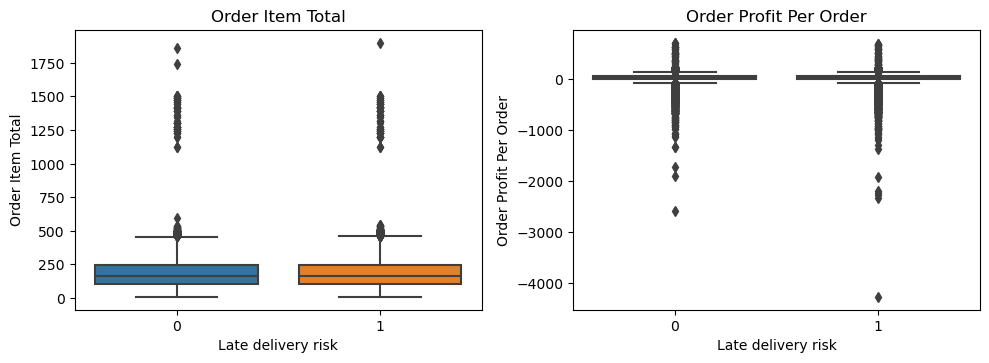

In [172]:
num_rows = 6
num_cols = 2
cols
subplot_index = 1
for i in range(0, len(cols)-1, 2):
    plt.figure(figsize=(10, 20))
    plt.subplot(num_rows, num_cols, subplot_index)
    sns.boxplot(x="Late_delivery_risk", y=cols[i], data=df_sample)
    plt.xlabel("Late delivery risk")
    plt.ylabel(cols[i])
    plt.title(cols[i])
    subplot_index += 1
    
    # Add the second subplot
    plt.subplot(num_rows, num_cols, subplot_index)
    sns.boxplot(x="Late_delivery_risk", y=cols[i+1], data=df_sample)
    plt.xlabel("Late delivery risk")
    plt.ylabel(cols[i+1])
    plt.title(cols[i+1])
    subplot_index += 1
    
    # Show the figure
    plt.tight_layout()
    plt.show()


## Statistical Hypothesis test with target variable:

##### MannWhitney U-hypotheisis test :

* <b> H0 : numerical mean[0]  = numerical mean [1]   </b>
* <b> H1 : numerical mean[0]  != Snumerical mean [1] </b>

* <b> H0 : There is no relation between late delivery risk and numerical col
* <b> H1 : There is relation between late delivery risk and numerical col

In [174]:
def cols_failing_mannwhitneyu(data):   
    failed_cat_cols = []
    for col in cat_num_cols(data)[1]:
        df_0= data[data["Late_delivery_risk"]==0][col]
        df_1= data[data["Late_delivery_risk"]==1][col]
        print(col,"---mannwhitneyu",stats.mannwhitneyu(df_0,df_1)[1])
        if stats.mannwhitneyu(df_0,df_1)[1]>=0.05:
            failed_cat_cols.append(col)
    return failed_cat_cols

In [175]:
df_sample.drop(cols_failing_mannwhitneyu(df_sample),axis=1,inplace=True)

Days for shipping (real) ---mannwhitneyu 0.0
Days for shipment (scheduled) ---mannwhitneyu 0.0
Latitude ---mannwhitneyu 0.44290962733866424
Longitude ---mannwhitneyu 0.9560681618360636
Order Item Discount ---mannwhitneyu 0.9016297635848012
Order Item Discount Rate ---mannwhitneyu 0.7910943507017261
Order Item Product Price ---mannwhitneyu 0.7540956408218071
Order Item Profit Ratio ---mannwhitneyu 0.9149521244603029
Order Item Quantity ---mannwhitneyu 0.6503558421625346
Sales ---mannwhitneyu 0.680970975269799
Order Item Total ---mannwhitneyu 0.6878973896567004
Order Profit Per Order ---mannwhitneyu 0.7337778411761569
Product Price ---mannwhitneyu 0.7540956408218071


* By using the <b>MannWhitney U-hypotheisis test </b> we check the mean of numerical features of late deilvery risk and
  mean numerical features of no late delivery risk and if both are equal then we its says that there is no relation     between late deliverly risk and given numerical feature

In [176]:
df_sample.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Customer City,Customer Id,Customer Segment,Customer Zipcode,Market,Order City,Order Country,Order Region,Order State,Order Status,Shipping Mode
0,DEBIT,5,4,Late delivery,1,Taylor,17,Consumer,48180.0,LATAM,Sorocaba,Brasil,South America,São Paulo,COMPLETE,Standard Class
1,TRANSFER,6,4,Late delivery,1,Caguas,8889,Consumer,725.0,Europe,Leicester,Reino Unido,Northern Europe,Inglaterra,PROCESSING,Standard Class
2,CASH,4,4,Shipping on time,0,Lynwood,10701,Consumer,90262.0,USCA,San Luis Obispo,Estados Unidos,West of USA,California,CLOSED,Standard Class


In [178]:
df_sample.shape

(50000, 16)

In [183]:
df_sample.drop(["Days for shipping (real)","Days for shipment (scheduled)","Delivery Status"],axis=1,inplace=True)

* These are the features which are directly giving the information about target which are getting from the feature
 engineering so we are drop that features.

In [ ]:
df_sample.to_csv('df_last.csv',index=False)

# Different types of models for Different Encoding:

In [69]:
from scipy import stats
import statsmodels.api as sm
import statistics
from statsmodels.stats import weightstats
#from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
# function to perform post-hoc test


# import function to perform post-hoc
import scikit_posthocs
from scipy import stats
from statsmodels.stats import weightstats
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score

In [62]:
df_sample = pd.read_csv("df_last.csv")

In [63]:
df_sample.shape

(50000, 13)

In [64]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                50000 non-null  object 
 1   Late_delivery_risk  50000 non-null  int64  
 2   Customer City       50000 non-null  object 
 3   Customer Id         50000 non-null  int64  
 4   Customer Segment    50000 non-null  object 
 5   Customer Zipcode    50000 non-null  float64
 6   Market              50000 non-null  object 
 7   Order City          50000 non-null  object 
 8   Order Country       50000 non-null  object 
 9   Order Region        50000 non-null  object 
 10  Order State         50000 non-null  object 
 11  Order Status        50000 non-null  object 
 12  Shipping Mode       50000 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 5.0+ MB


## MODELS 1 : 

### Encoding :
* Target encoding <b> (probability encoding all except type and shipping mode </b>
* Dummy Encoidng on Type, Shipping mode

In [24]:
df_model_1 = df_sample.copy()

In [25]:
#Target Encode
def Target_encode_test(data,cols):
    d_map = {}
    for col in cols:
        cross = pd.crosstab(data[col],data["Late_delivery_risk"])
        cross["prob"] = cross[1]/(cross[1]+cross[0])
        d = {}
        for cat in cross.index:
            d[cat] = cross.loc[cat,"prob"]
        d_map[col] = d
    return d_map   

In [26]:
def map_categories_encode(data,dic):
    for col in dic.keys():
        data[col]= data[col].map(dic[col])

In [27]:
en_cols = df_model_1.columns.drop(["Late_delivery_risk","Type","Shipping Mode"])
Tar_encode_dict = Target_encode_test(df_model_1,en_cols)
map_categories_encode(df_model_1,Tar_encode_dict)

In [28]:
df_model_1.head(4)

,Type,Late_delivery_risk,Customer City,Customer Id,Customer Segment,Customer Zipcode,Market,Order City,Order Country,Order Region,Order State,Order Status,Shipping Mode
0,DEBIT,1,0.588235,0.428571,0.546311,0.588235,0.541360,0.666667,0.532937,0.534044,0.553704,0.571845,Standard Class
1,TRANSFER,1,0.546353,0.571429,0.546311,0.546353,0.557981,0.700000,0.534328,0.544673,0.538627,0.575902,Standard Class
2,CASH,0,0.518519,0.400000,0.546311,0.518519,0.537456,0.000000,0.540035,0.523765,0.526045,0.571559,Standard Class
3,CASH,1,0.546353,1.000000,0.546311,0.546353,0.553627,0.535714,0.574468,0.564974,0.535714,0.571559,Same Day


In [29]:
df_final = pd.get_dummies(df_model_1,drop_first=True)

### train_test_split

In [30]:
x = df_final.drop("Late_delivery_risk",axis=1)
y = df_final["Late_delivery_risk"]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=34)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

x_train (40000, 16)
x_test (10000, 16)
y_train (40000,)
y_test (10000,)


### BASE MODEL 

* From Bussinees point of view we need to get a <b> good recall score  because when we prdict its an late delivery risk and its not then not a problem but when we say its not a late delivery risk and its actually a late delivery then its a problem.</b>
* So, we try to focus mainly on recall score and not on accuracy

# Naive Bayes

Test Recall: 0.9556695365451547
Train Recall: 0.9528495284952849


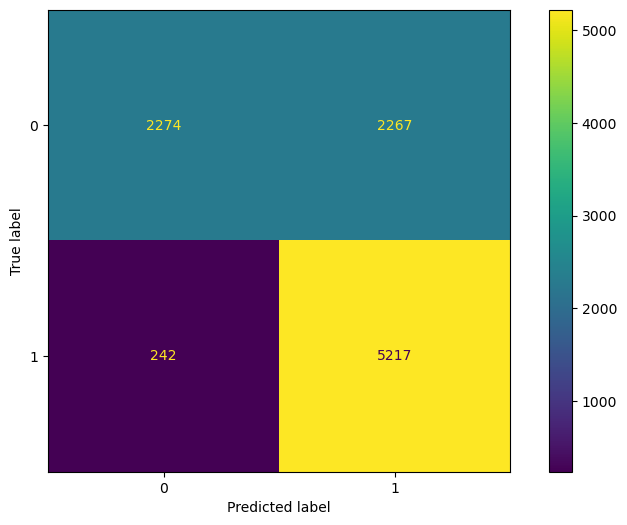

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assume we have our input features in a variable called X and our labels in a variable called y
# Split the data into training and testing sets
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

nb_classifier.fit(x_train,y_train)
y_pred_test = nb_classifier.predict(x_test)
y_pred_train = nb_classifier.predict(x_train)
nb_classifier.score(x_test,y_test)
print("Test Recall:", recall_score(y_test,y_pred_test))
print("Train Recall:", recall_score(y_train,y_pred_train))

#cm = confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)
plt.show()

In [39]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64      4541
           1       0.70      0.96      0.81      5459

    accuracy                           0.75     10000
   macro avg       0.80      0.73      0.73     10000
weighted avg       0.79      0.75      0.73     10000



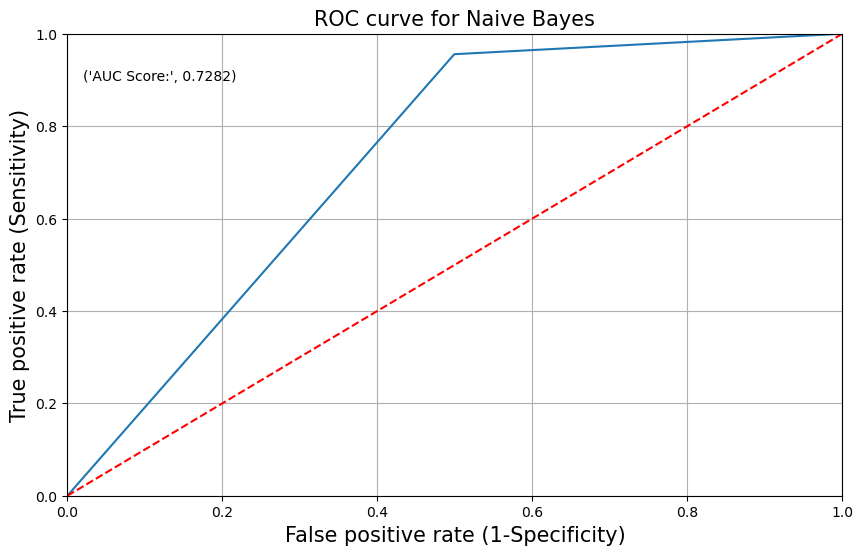

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr)
# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Naive Bayes', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_test),4)))
                               
# plot the grid
plt.grid(True)

# Logistic 

In [44]:
lg = sm.Logit(y_train,x_train).fit()
lg.summary()

Optimization terminated successfully.
         Current function value: 0.305381
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Late_delivery_risk   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39984
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.5564
Time:                        09:42:39   Log-Likelihood:                -12215.
converged:                       True   LL-Null:                       -27535.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Customer City                   -0.1189      0.372     -0.319      0.750      -0.849       0.611
Customer Id                      6.2515      0.076     82.140      0.000       6.102       6.401
Customer Segment               -10.4364      1.873     -5.573      0.000     -14.107      -6.766
Customer Zipcode                -0.2337      0.287     -0.815      0.415      -0.796       0.328
Market                          -4.0320      2.169     -1.859      0.063      -8.282       0.218
Order City                       4.9340      0.148     33.314      0.000       4.644       5.224
Order Country                   -1.0293      0.553     -1.860      0.063      -2.114       0.055
Order Region                    -2.2896      1.369     -1.673      0.094      -4.972       0.393
Order State                      0.0135      0.253      0.053      0.957      -0.482       0.509
Order Status                    19.9702      1.253     15.938      0.000      17.514      22.426
Type_DEBIT                       0.0849      0.054      1.570      0.116      -0.021       0.191
Type_PAYMENT                    -0.0933      0.058     -1.611      0.107      -0.207       0.020
Type_TRANSFER                   -0.1121      0.058     -1.931      0.053      -0.226       0.002
Shipping Mode_Same Day          -7.6394      0.585    -13.062      0.000      -8.786      -6.493
Shipping Mode_Second Class      -6.1236      0.582    -10.513      0.000      -7.265      -4.982
Shipping Mode_Standard Class    -7.8997      0.582    -13.574      0.000      -9.040      -6.759
================================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Train recall 0.8640608628308505
Test recall 0.8629785675032057


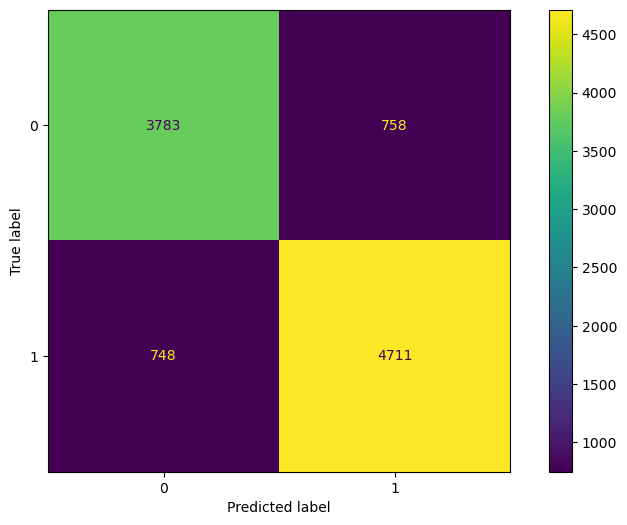

In [45]:
print(f"Train recall {recall_score(y_train,lg.predict(x_train).map(lambda x: 1 if x>0.5 else 0))}")
print(f"Test recall {recall_score(y_test,lg.predict(x_test).map(lambda x: 1 if x>0.5 else 0))}")
ConfusionMatrixDisplay.from_predictions(y_test,lg.predict(x_test).map(lambda x: 1 if x>0.5 else 0))
plt.show()

## SUMMARY FOR ABOVE ALL MODELS FOR FIRST ENCODING :

In [47]:
clfs = {
      'RandomForest':RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'GradientBoost': GradientBoostingClassifier(),
      'XGBoost': XGBClassifier(),
        'BaggingRF': BaggingClassifier(base_estimator=RandomForestClassifier()),
       'BaggingAda': BaggingClassifier(base_estimator=AdaBoostClassifier()),
       'BaggingGB': BaggingClassifier(base_estimator=GradientBoostingClassifier()),
       'BaggingXGB': BaggingClassifier(base_estimator=XGBClassifier()),
        'GaussianNB': GaussianNB()}

model_report = pd.DataFrame(columns = ["Model","Train_Accuracy_score","Test_Accuracy_score","Train_Recall_score","Test_Recall_score"])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred_prob_test = clf.predict(x_test)
    y_pred_test = [1 if i > 0.5 else 0 for i in y_pred_prob_test]
    y_pred_prob_train = clf.predict(x_train)
    y_pred_train = [1 if i > 0.5 else 0 for i in y_pred_prob_train]
    
    print('Fitting the model .......', clf_name)
    t= pd.Series({
        'Model': clf_name,
      'Train_Accuracy_score':accuracy_score(y_train,y_pred_train),
        'Test_Accuracy_score':accuracy_score(y_test,y_pred_test),
        'Train_Recall_score':recall_score(y_train,y_pred_train),
        'Test_Recall_score':recall_score(y_test,y_pred_test)
        
    })
    model_report = model_report.append(t,ignore_index=True)
#Focusing mainly on recall score so we sort by recall score to get our best model
model_report = model_report.sort_values(by='Test_Recall_score', ascending=False)
model_report

Fitting the model ....... RandomForest
Fitting the model ....... AdaBoost
Fitting the model ....... GradientBoost
Fitting the model ....... XGBoost
Fitting the model ....... BaggingRF
Fitting the model ....... BaggingAda
Fitting the model ....... BaggingGB
Fitting the model ....... BaggingXGB
Fitting the model ....... GaussianNB


,Model,Train_Accuracy_score,Test_Accuracy_score,Train_Recall_score,Test_Recall_score
8,GaussianNB,0.750475,0.7491,0.952850,0.955670
0,RandomForest,0.998300,0.8966,0.998041,0.903096
4,BaggingRF,0.979075,0.8944,0.979226,0.902913
7,BaggingXGB,0.898950,0.8649,0.896178,0.869207
3,XGBoost,0.897450,0.8585,0.895176,0.865910
5,BaggingAda,0.855200,0.8516,0.863651,0.865360
1,AdaBoost,0.851800,0.8503,0.861510,0.863162
6,BaggingGB,0.859925,0.8542,0.862284,0.859315
2,GradientBoost,0.859500,0.8535,0.861328,0.858399


* Gaussian NB is high in recall score but over all accuracy is very low so on model 1 we select as <b>XG boost 
 becuase its generelised model.</b>

## MODELS 2 : 

### encoding
* <b> dropping</b> Market,Order Country,Order region,Order state
* Target encoding <b> (probability encoding all except type and shipping mode </b>
* Dummy Encoidng on Type, Shipping mode

In [48]:
df_model_2 = df_sample.copy()

In [49]:
df_model_2.drop(["Customer Segment","Order Country","Order State"],axis=1,inplace=True)

In [50]:
en_cols = df_model_2.columns.drop(["Late_delivery_risk","Order Status","Shipping Mode","Type","Market"])
Tar_encode_dict = Target_encode_test(df_model_2,en_cols)
map_categories_encode(df_model_2,Tar_encode_dict)
df_final = pd.get_dummies(df_model_2,drop_first=True)
x = df_final.drop("Late_delivery_risk",axis=1)
y = df_final["Late_delivery_risk"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=34)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

x_train (40000, 23)
x_test (10000, 23)
y_train (40000,)
y_test (10000,)


In [51]:
df_final.head(3)

,Late_delivery_risk,Customer City,Customer Id,Customer Zipcode,Order City,Order Region,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,1,0.588235,0.428571,0.588235,0.666667,0.534044,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,0.546353,0.571429,0.546353,0.700000,0.544673,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0.518519,0.400000,0.518519,0.000000,0.523765,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


## SUMMARY FOR ABOVE ALL MODELS FOR SECOND ENCODING :

In [52]:
# checking for all vanila model
clfs = {
      'RandomForest':RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'GradientBoost': GradientBoostingClassifier(),
      'XGBoost': XGBClassifier(),
        'BaggingRF': BaggingClassifier(base_estimator=RandomForestClassifier()),
       'BaggingAda': BaggingClassifier(base_estimator=AdaBoostClassifier()),
       'BaggingGB': BaggingClassifier(base_estimator=GradientBoostingClassifier()),
       'BaggingXGB': BaggingClassifier(base_estimator=XGBClassifier()),
        'GaussianNB': GaussianNB()}

model_report = pd.DataFrame(columns = ["Model","Train_Accuracy_score","Test_Accuracy_score","Train_Recall_score","Test_Recall_score"])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred_prob_test = clf.predict(x_test)
    y_pred_test = [1 if i > 0.5 else 0 for i in y_pred_prob_test]
    y_pred_prob_train = clf.predict(x_train)
    y_pred_train = [1 if i > 0.5 else 0 for i in y_pred_prob_train]
    
    print('Fitting the model .......', clf_name)
    t= pd.Series({
        'Model': clf_name,
      'Train_Accuracy_score':accuracy_score(y_train,y_pred_train),
        'Test_Accuracy_score':accuracy_score(y_test,y_pred_test),
        'Train_Recall_score':recall_score(y_train,y_pred_train),
        'Test_Recall_score':recall_score(y_test,y_pred_test)
        
    })
    model_report = model_report.append(t,ignore_index=True)
#Focusing mainly on recall score so we sort by recall score to get our best model
model_report = model_report.sort_values(by='Test_Recall_score', ascending=False)
model_report

Fitting the model ....... RandomForest
Fitting the model ....... AdaBoost
Fitting the model ....... GradientBoost
Fitting the model ....... XGBoost
Fitting the model ....... BaggingRF
Fitting the model ....... BaggingAda
Fitting the model ....... BaggingGB
Fitting the model ....... BaggingXGB
Fitting the model ....... GaussianNB


,Model,Train_Accuracy_score,Test_Accuracy_score,Train_Recall_score,Test_Recall_score
8,GaussianNB,0.571425,0.5674,1.000000,1.000000
0,RandomForest,0.995550,0.8951,0.995399,0.903462
4,BaggingRF,0.975325,0.8874,0.975992,0.897967
1,AdaBoost,0.849800,0.8443,0.870256,0.868657
5,BaggingAda,0.850025,0.8445,0.867523,0.865910
3,XGBoost,0.895250,0.8580,0.890939,0.862246
7,BaggingXGB,0.894250,0.8598,0.890574,0.862063
2,GradientBoost,0.857775,0.8505,0.861783,0.858033
6,BaggingGB,0.857675,0.8517,0.860781,0.858033


* Gaussian NB is high in recall score but over all accuracy is very low so on model 2 we select as <b>XG boost 
 becuase its generelised model.</b> So XG boost is consistent for most of the encoding.

## MODELS - 3 :

In [65]:
df_model_3 = df_sample.copy()

### encoding
* <b> dropping</b> Customer Segment,Order Country,Order State,Market,Order Region
* Target encoding <b> (probability encoding all except type and shipping mode </b>
* Dummy Encoidng on Type, Shipping mode

In [66]:
df_model_3.drop(["Customer Segment","Order Country","Order State","Market","Order Region"],axis=1,inplace=True)

### Feature Engineering  

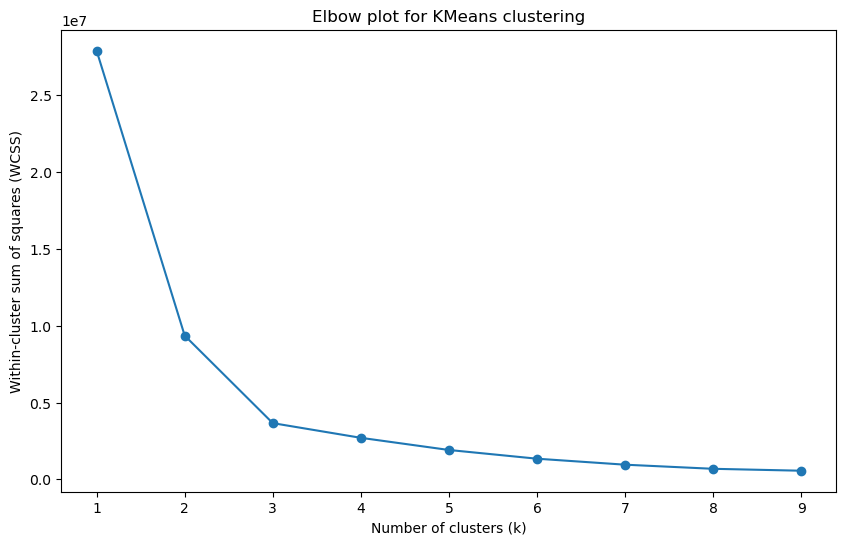

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data
# Define the range of k values to test
k_values = range(1, 10)

# Initialize empty list to store within-cluster sum of squares (WCSS)
wcss = []

# Loop over k values and fit KMeans model for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_long_lat.values)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each k value
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow plot for KMeans clustering')
plt.show()

* From the above elbow plot we clearly see that the <b> Kmeans cluster is 3 or 4 </b> and for verification  we will check that again by using <b> silhouute Score </b>

#### Silhoutte Score :

In [70]:
n_clusters = [3, 4, 5, 6,7,8,9,10,11,12,13]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_long_lat.values)
    score = silhouette_score(df_long_lat.values, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K,score))

For 3 clusters the silhouette score is 0.7525907768981563)
For 4 clusters the silhouette score is 0.7298424817678799)
For 5 clusters the silhouette score is 0.7336232355347667)
For 6 clusters the silhouette score is 0.7476100629833585)
For 7 clusters the silhouette score is 0.7398595546753012)
For 8 clusters the silhouette score is 0.7805219731323972)
For 9 clusters the silhouette score is 0.7832214285051785)
For 10 clusters the silhouette score is 0.7531811512464704)
For 11 clusters the silhouette score is 0.7649434283576677)
For 12 clusters the silhouette score is 0.7490215761985078)
For 13 clusters the silhouette score is 0.7579750359538543)


In [71]:
new_clusters = KMeans(n_clusters = 3, random_state = 10)
new_clusters.fit(df_long_lat.values)
# append the cluster label for each point in the dataframe 'df_cust'
df_model_3['Cluster'] = new_clusters.labels_

In [72]:
df_model_3['Cluster'] = df_model_3['Cluster'].astype(object)

In [73]:
target = pd.crosstab(df_model_3["Cluster"],df_model_3["Late_delivery_risk"]).values
print("---Dependency with target: ",stats.chi2_contingency(target)[1])

---Dependency with target:  0.15569327981055853


In [76]:
en_cols = df_model_3.columns.drop(["Late_delivery_risk","Shipping Mode","Type"])
Tar_encode_dict = Target_encode_test(df_model_3,en_cols)
map_categories_encode(df_model_3,Tar_encode_dict)
df_final = pd.get_dummies(df_model_3,drop_first=True)
x = df_final.drop("Late_delivery_risk",axis=1)
y = df_final["Late_delivery_risk"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=34)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

x_train (40000, 12)
x_test (10000, 12)
y_train (40000,)
y_test (10000,)


## SUMMARY FOR ABOVE ALL MODELS FOR SECOND ENCODING :

In [77]:
# checking for all vanila model
clfs = {
      'RandomForest':RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'GradientBoost': GradientBoostingClassifier(),
      'XGBoost': XGBClassifier(),
        'BaggingRF': BaggingClassifier(base_estimator=RandomForestClassifier()),
       'BaggingAda': BaggingClassifier(base_estimator=AdaBoostClassifier()),
       'BaggingGB': BaggingClassifier(base_estimator=GradientBoostingClassifier()),
       'BaggingXGB': BaggingClassifier(base_estimator=XGBClassifier()),
        'GaussianNB': GaussianNB()}

model_report = pd.DataFrame(columns = ["Model","Accuracy_score","Recall_score","F1_score"])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred_prob = clf.predict(x_test)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred_prob]
    print('Fitting the model .......', clf_name)
    t= pd.Series({
        'Model': clf_name,
        'Accuracy_score': accuracy_score(y_test, y_pred),
        'Recall_score':recall_score(y_test,y_pred),
        'F1_score': f1_score(y_test, y_pred)
    })
    model_report = model_report.append(t,ignore_index=True)
#Focusing mainly on recall score so we sort by recall score to get our best model
model_report = model_report.sort_values(by='Recall_score', ascending=False)
model_report

Fitting the model ....... RandomForest
Fitting the model ....... AdaBoost
Fitting the model ....... GradientBoost
Fitting the model ....... XGBoost
Fitting the model ....... BaggingRF
Fitting the model ....... BaggingAda
Fitting the model ....... BaggingGB
Fitting the model ....... BaggingXGB
Fitting the model ....... GaussianNB


,Model,Accuracy_score,Recall_score,F1_score
8,GaussianNB,0.7446,0.957318,0.803629
0,RandomForest,0.8861,0.896684,0.895782
4,BaggingRF,0.8835,0.890822,0.893031
1,AdaBoost,0.8503,0.863162,0.862925
3,XGBoost,0.8576,0.861147,0.868465
7,BaggingXGB,0.8592,0.861147,0.869750
6,BaggingGB,0.8532,0.858399,0.864576
2,GradientBoost,0.8538,0.857483,0.864930
5,BaggingAda,0.8512,0.855834,0.862629


### Models 1 gives better results than Models 2 and  Models 3

* In Models 1, <b> Xg boost </b> is best model and generalised model.

## Hyperparameter Tunning  of XG BOOST :

In [ ]:
xgb_model = xgb.XGBClassifier()
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their ranges for RandomizedSearchCV
param_distributions = {'n_estimators': np.arange(100,500,100),
                       
                       'max_depth': ["none",1,2,3,4,5],
                       'subsample': np.arange(0.5, 1.0, 0.05),
                       'gamma': np.arange(0, 5)}

# Create the RandomizedSearchCV object
rs = RandomizedSearchCV(xgb_model, param_distributions, cv=5, n_iter=50, n_jobs=-1, random_state=42)

# Fit the model with the training data
rs.fit(x_train, y_train.values.ravel())

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", rs.best_params_)
print("Best Score: ", rs.best_score_)

* Best Hyperparameters:  {'n_estimators': 400, 'max_depth': 4, 'gamma': 1}

Test Recall 0.859314892837516
Train Recall 0.8641519748530818


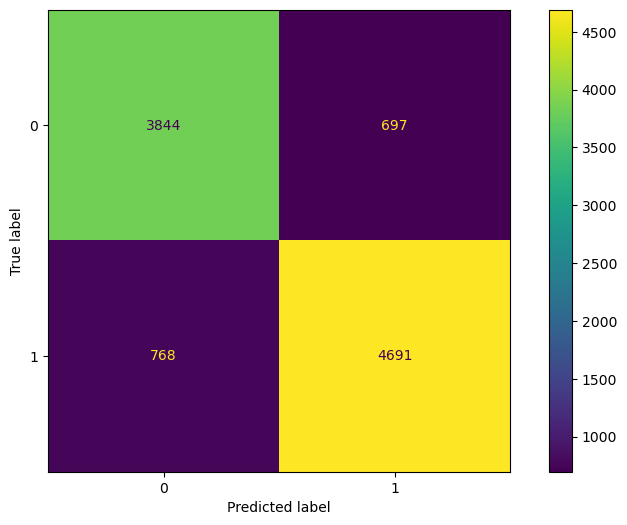

In [80]:
XGB = XGBClassifier(n_estimators = 400,max_depth = 4,gamma=1)
XGB.fit(x_train,y_train)
y_pred_test = XGB.predict(x_test)
y_pred_train = XGB.predict(x_train)
print("Test Recall", recall_score(y_test,y_pred_test))
print("Train Recall", recall_score(y_train,y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)
plt.show()

In [81]:
y_pred_prob_test = XGB.predict(x_test)
y_pred_test = [1 if i > 0.5 else 0 for i in y_pred_prob_test]
y_pred_prob_train = XGB.predict(x_train)
y_pred_train = [1 if i > 0.5 else 0 for i in y_pred_prob_train]

print('Train_Accuracy_score',accuracy_score(y_train,y_pred_train))
print('Test_Accuracy_score',accuracy_score(y_test,y_pred_test))
print('Train_Recall_score',recall_score(y_train,y_pred_train))
print('Test_Recall_score',recall_score(y_test,y_pred_test))

Train_Accuracy_score 0.86095
Test_Accuracy_score 0.8535
Train_Recall_score 0.8641519748530818
Test_Recall_score 0.859314892837516


###  Feature Importance of XG Boost Classifier :

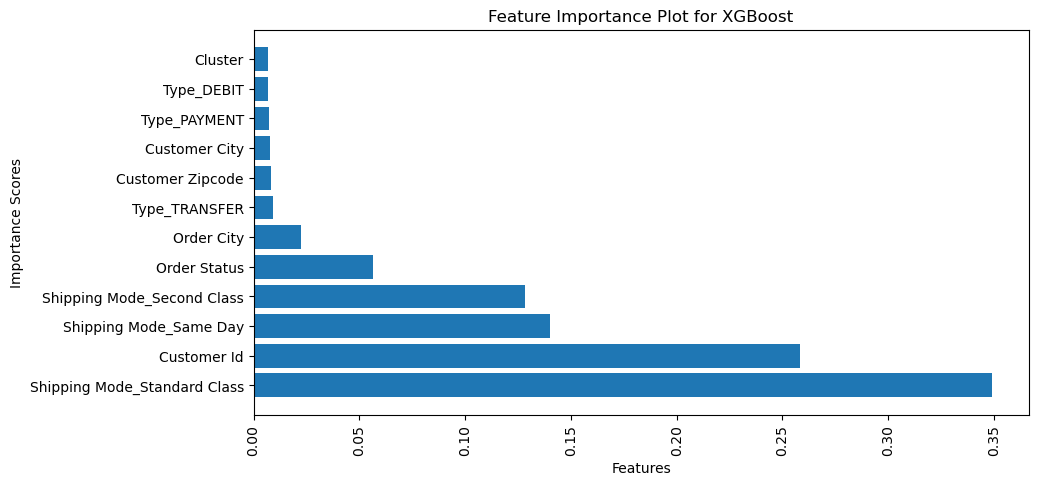

In [82]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)

importance_scores = XGB.feature_importances_

feature_names = list(x_train.columns)
sorted_indices = importance_scores.argsort()[::-1]
importance_scores_sorted = importance_scores[sorted_indices]
feature_names_sorted = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 5))
plt.barh(feature_names_sorted, importance_scores_sorted)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Scores")
plt.title("Feature Importance Plot for XGBoost")
plt.show()

##  business Interpretation :

* Here we got the consistent result for the Xg Boost after hyper parameter tunning and for business Interpretation
  recall is very important for us it like actual we late dilvery risk(1) but we predict not late delivery risk (0) 
  so it is <b> False negative </b> that why  we want <b>recall score is good</b>. 

*<b> Shipping mode</b>: The shipping mode (standard class, same day, and second class) is the most important feature in predicting the risk of late delivery. This suggests that the choice of shipping mode plays a significant role in determining whether an order will be delivered on time or not. Businesses may need to focus on optimizing their shipping processes for different shipping modes to reduce the risk of delays and improve customer satisfaction.


<b>Customer ID</b>: The customer ID is the second most important feature in predicting the risk of late delivery. This suggests that certain customers are more likely to experience delivery delays than others
